In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [3]:
# independent features
X=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
# dependent feature 
y=pd.Series(diabetes.target)
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Length: 442, dtype: float64

In [22]:
# train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
X_train.shape,X_test.shape

((309, 10), (133, 10))

In [24]:
# check for correlation
corr=X_train.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.136522,0.181976,0.308406,0.261534,0.200301,-0.023100,0.165340,0.270981,0.262201
sex,0.136522,1.000000,0.044746,0.165128,0.033717,0.128023,-0.344052,0.320619,0.121299,0.159936
bmi,0.181976,0.044746,1.000000,0.384534,0.246802,0.255519,-0.372335,0.431946,0.448657,0.394699
bp,0.308406,0.165128,0.384534,1.000000,0.242052,0.164355,-0.113747,0.209316,0.362476,0.376421
s1,0.261534,0.033717,0.246802,0.242052,1.000000,0.891476,0.044128,0.556987,0.528922,0.323666
s2,0.200301,0.128023,0.255519,0.164355,0.891476,1.000000,-0.190767,0.653120,0.307541,0.298647
s3,-0.023100,-0.344052,-0.372335,-0.113747,0.044128,-0.190767,1.000000,-0.732862,-0.388778,-0.304091
s4,0.165340,0.320619,0.431946,0.209316,0.556987,0.653120,-0.732862,1.000000,0.629707,0.441489
s5,0.270981,0.121299,0.448657,0.362476,0.528922,0.307541,-0.388778,0.629707,1.000000,0.464878
s6,0.262201,0.159936,0.394699,0.376421,0.323666,0.298647,-0.304091,0.441489,0.464878,1.000000


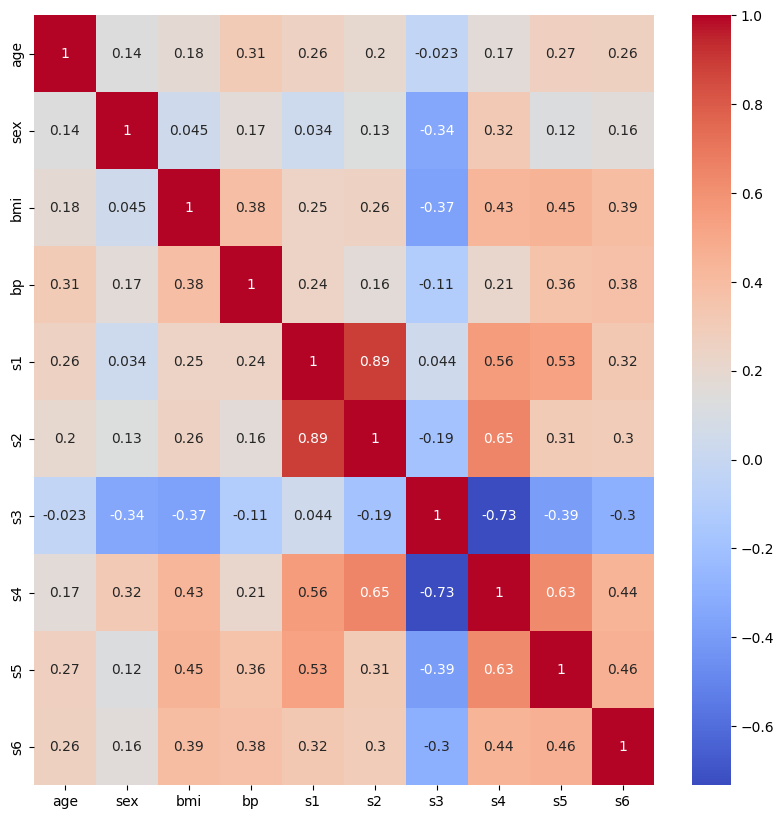

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

In [26]:
# apply decision tree regressor with hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree_regressor=DecisionTreeRegressor()

criterion=["squared_error", "friedman_mse", "absolute_error", "poisson"]
splitter=["best","random"]
max_depth=[1,2,3,4,5,6,7,8,9,10,15,20,25]
max_features=["sqrt","log2"]

params=dict(criterion=criterion,splitter=splitter,max_depth=max_depth,max_features=max_features)

In [27]:
grid=GridSearchCV(estimator=tree_regressor,param_grid=params,scoring="r2",cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                       25],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [28]:
y_pred=grid.predict(X_test)
print(y_pred)

[110.2137931  110.2137931  110.2137931  256.78571429 110.2137931
 110.2137931  194.80232558 224.92857143 110.2137931  110.2137931
 110.2137931  194.80232558 110.2137931  194.80232558 113.375
 110.2137931  224.92857143 194.80232558 194.80232558 194.80232558
 194.80232558 110.2137931  110.2137931  192.72727273 110.2137931
 194.80232558 194.80232558 194.80232558 110.2137931  110.2137931
 194.80232558 110.2137931  110.2137931  194.80232558 149.84210526
 192.72727273 194.80232558 110.2137931  194.80232558 110.2137931
 110.2137931  192.72727273 194.80232558 194.80232558 110.2137931
 110.2137931  110.2137931  110.2137931  110.2137931  110.2137931
 110.2137931  110.2137931  194.80232558 110.2137931  256.78571429
 110.2137931  110.2137931  194.80232558 110.2137931  110.2137931
 110.2137931  194.80232558 110.2137931  192.72727273 194.80232558
 192.72727273 149.84210526 194.80232558 110.2137931  194.80232558
 194.80232558 149.84210526 194.80232558 194.80232558 110.2137931
 256.78571429 224.928571

In [29]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [30]:
grid.best_score_

np.float64(0.3150309561186083)

In [31]:
from sklearn.metrics import r2_score,mean_absolute_error

mae=mean_absolute_error(y_pred=y_pred,y_true=y_test)
r2=r2_score(y_true=y_test,y_pred=y_pred)

print(mae)
print(r2)

53.17553619824855
0.2017324433687977
